### Merging data frames

In [2]:
import pandas as pd

In [41]:
# Load the CSV files
Bounce_wCRQA = pd.read_csv('Bounce_wCRQA_Regression_Ready.csv')
Questionnaires = pd.read_csv('Questionnaire_df_analysis_ready.csv')
Togetherness = pd.read_csv('Togetherness_LongFormat_final.csv')


In [4]:
print(Bounce_wCRQA)

   Pair_ID Participant_ID    Role Condition   mean_RR    std_RR    max_RR  \
0   L10F10            L10    Lead    closed  0.028838  0.017350  0.070312   
1   L10F10            L10    Lead      open  0.021332  0.014313  0.063368   
2    L10F9            L10    Lead    closed  0.020569  0.017348  0.071615   
3    L10F9            L10    Lead      open  0.022953  0.014108  0.060330   
4   L11F11            L11    Lead    closed  0.016642  0.011777  0.046875   
..     ...            ...     ...       ...       ...       ...       ...   
79    L8F8             F8  Follow      open  0.019763  0.014172  0.071181   
80   L9F10            F10  Follow    closed  0.023683  0.013516  0.061198   
81   L9F10            F10  Follow      open  0.016016  0.013183  0.057726   
82    L9F9             F9  Follow    closed  0.026744  0.017515  0.062934   
83    L9F9             F9  Follow      open  0.029503  0.025965  0.124132   

    mean_DET  mean_LAM  mean_RR_z  std_RR_z  max_RR_z  mean_DET_z  mean_LAM

In [18]:
print(Togetherness)

   Pair_ID Condition  dyadic_togetherness  lead_follow_corr  \
0   L10F10    closed             0.349822          0.538523   
1   L10F10      open             0.465427          0.681571   
2    L10F9    closed             0.286452          0.735625   
3    L10F9      open             0.274532          0.008090   
4   L11F11    closed             0.377239         -0.311606   
5   L11F11      open             0.280424          0.801161   
6   L11F12    closed             0.269221          0.785548   
7   L11F12      open             0.262569          0.486119   
8   L12F11    closed             0.263763          0.651268   
9   L12F11      open             0.307156          0.763773   
10  L12F12    closed             0.236589          0.851467   
11  L12F12      open             0.248539          0.834635   
12    L1F1    closed             0.596879          0.750038   
13    L1F1      open             0.571664          0.857875   
14    L1F2    closed             0.587600          0.75

In [42]:
# Rename values
condition_map = {
    "Closed Leading": "closed",
    "Open Leading": "open"
}

Questionnaires["Condition"] = Questionnaires["Condition"].map(condition_map)


In [20]:
print(Questionnaires)

   Participant_ID    Role Pair_ID Condition  Familiarity_num  Agr_mean  \
0              F1  Follow    L1F1    closed                3       3.0   
1              F1  Follow    L1F1      open                3       3.0   
2             F10  Follow  L10F10    closed                1       4.0   
3             F10  Follow  L10F10      open                1       4.0   
4             F10  Follow   L9F10    closed                1       4.0   
5             F10  Follow   L9F10      open                1       4.0   
6             F11  Follow  L11F11    closed                2       3.5   
7             F11  Follow  L11F11      open                2       3.5   
8             F11  Follow  L12F11    closed                1       3.5   
9             F11  Follow  L12F11      open                1       3.5   
10            F12  Follow  L12F12    closed                2       3.5   
11            F12  Follow  L12F12      open                2       3.5   
12            F12  Follow  L11F12    c

In [43]:
### Merge into one dataframe

# Merge Bounce (WCRQA) + Questionnaire
merged_1 = Bounce_wCRQA.merge(
    Questionnaires,
    on=["Participant_ID", "Pair_ID", "Condition"],
    how="left",
    validate="one_to_one"
)

In [44]:
print(merged_1)

   Pair_ID Participant_ID  Role_x Condition   mean_RR    std_RR    max_RR  \
0   L10F10            L10    Lead    closed  0.028838  0.017350  0.070312   
1   L10F10            L10    Lead      open  0.021332  0.014313  0.063368   
2    L10F9            L10    Lead    closed  0.020569  0.017348  0.071615   
3    L10F9            L10    Lead      open  0.022953  0.014108  0.060330   
4   L11F11            L11    Lead    closed  0.016642  0.011777  0.046875   
5   L11F11            L11    Lead      open  0.027995  0.019730  0.064236   
6   L11F12            L11    Lead    closed  0.024068  0.026118  0.087674   
7   L11F12            L11    Lead      open  0.031973  0.029950  0.128472   
8   L12F11            L12    Lead    closed  0.041884  0.036993  0.137587   
9   L12F11            L12    Lead      open  0.030585  0.029938  0.134549   
10  L12F12            L12    Lead    closed  0.023645  0.016364  0.080295   
11  L12F12            L12    Lead      open  0.026254  0.020508  0.095486   

In [45]:
# drop column
merged_1 = merged_1.drop(columns=["Role_y"])

In [ ]:
# rename column
merged_1 = merged_1.rename(columns={"Role_x": "Role"})

In [48]:
print(merged_1)

   Pair_ID Participant_ID    Role Condition   mean_RR    std_RR    max_RR  \
0   L10F10            L10    Lead    closed  0.028838  0.017350  0.070312   
1   L10F10            L10    Lead      open  0.021332  0.014313  0.063368   
2    L10F9            L10    Lead    closed  0.020569  0.017348  0.071615   
3    L10F9            L10    Lead      open  0.022953  0.014108  0.060330   
4   L11F11            L11    Lead    closed  0.016642  0.011777  0.046875   
5   L11F11            L11    Lead      open  0.027995  0.019730  0.064236   
6   L11F12            L11    Lead    closed  0.024068  0.026118  0.087674   
7   L11F12            L11    Lead      open  0.031973  0.029950  0.128472   
8   L12F11            L12    Lead    closed  0.041884  0.036993  0.137587   
9   L12F11            L12    Lead      open  0.030585  0.029938  0.134549   
10  L12F12            L12    Lead    closed  0.023645  0.016364  0.080295   
11  L12F12            L12    Lead      open  0.026254  0.020508  0.095486   

In [49]:
# Add togetherness ratings
final_df = merged_1.merge(
    Togetherness,
    on=["Participant_ID", "Pair_ID", "Condition"],
    how="left",
    validate="many_to_one"
)


In [50]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)

print(final_df)

   Pair_ID Participant_ID  Role_x Condition   mean_RR    std_RR    max_RR  \
0   L10F10            L10    Lead    closed  0.028838  0.017350  0.070312   
1   L10F10            L10    Lead      open  0.021332  0.014313  0.063368   
2    L10F9            L10    Lead    closed  0.020569  0.017348  0.071615   
3    L10F9            L10    Lead      open  0.022953  0.014108  0.060330   
4   L11F11            L11    Lead    closed  0.016642  0.011777  0.046875   
5   L11F11            L11    Lead      open  0.027995  0.019730  0.064236   
6   L11F12            L11    Lead    closed  0.024068  0.026118  0.087674   
7   L11F12            L11    Lead      open  0.031973  0.029950  0.128472   
8   L12F11            L12    Lead    closed  0.041884  0.036993  0.137587   
9   L12F11            L12    Lead      open  0.030585  0.029938  0.134549   
10  L12F12            L12    Lead    closed  0.023645  0.016364  0.080295   
11  L12F12            L12    Lead      open  0.026254  0.020508  0.095486   

In [51]:
# drop column
final_df = final_df.drop(columns=["Role_y"])
# rename column
final_df = final_df.rename(columns={"Role_x": "Role"})

In [52]:
print(final_df)

   Pair_ID Participant_ID    Role Condition   mean_RR    std_RR    max_RR  \
0   L10F10            L10    Lead    closed  0.028838  0.017350  0.070312   
1   L10F10            L10    Lead      open  0.021332  0.014313  0.063368   
2    L10F9            L10    Lead    closed  0.020569  0.017348  0.071615   
3    L10F9            L10    Lead      open  0.022953  0.014108  0.060330   
4   L11F11            L11    Lead    closed  0.016642  0.011777  0.046875   
5   L11F11            L11    Lead      open  0.027995  0.019730  0.064236   
6   L11F12            L11    Lead    closed  0.024068  0.026118  0.087674   
7   L11F12            L11    Lead      open  0.031973  0.029950  0.128472   
8   L12F11            L12    Lead    closed  0.041884  0.036993  0.137587   
9   L12F11            L12    Lead      open  0.030585  0.029938  0.134549   
10  L12F12            L12    Lead    closed  0.023645  0.016364  0.080295   
11  L12F12            L12    Lead      open  0.026254  0.020508  0.095486   

In [53]:
print(final_df.columns.tolist())


['Pair_ID', 'Participant_ID', 'Role', 'Condition', 'mean_RR', 'std_RR', 'max_RR', 'mean_DET', 'mean_LAM', 'mean_RR_z', 'std_RR_z', 'max_RR_z', 'mean_DET_z', 'mean_LAM_z', 'Familiarity_num', 'Agr_mean', 'MeanAgr_z', 'Ext_mean', 'MeanExt_z', 'SD_mean', 'MeanSD_z', 'BA_mean', 'MeanBA_z', 'dyadic_togetherness', 'lead_follow_corr', 'lead_follow_corr_p', 'lead_mean_z', 'follow_mean_z', 'lead_id', 'follow_id', 'rating_mean', 'rating_mean_z']


### Regression

In [54]:
import statsmodels.formula.api as smf

In [55]:
# Make role categorical
final_df["Role"] = final_df["Role"].astype("category")

### Models: Role as fixed

#### Role as fixed effect: DET

mean_DET_z - synchrony  
MeanBA_z -  Body Awareness as experience  
MeanAgr_z - Agreeableness as personality


In [142]:
# Model with role as fixed effect
model_role_DET= smf.mixedlm(
    "rating_mean_z ~ mean_DET_z + Role + Condition + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df,
    groups=final_df["Participant_ID"]         # random intercept per dyad
).fit(reml=False)

print(model_role_DET.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: rating_mean_z
No. Observations:  84      Method:             ML           
No. Groups:        24      Scale:              0.4795       
Min. group size:   2       Log-Likelihood:     -105.3598    
Max. group size:   4       Converged:          Yes          
Mean group size:   3.5                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          0.373    0.310  1.203 0.229 -0.235  0.980
Role[T.Lead]      -0.001    0.327 -0.003 0.997 -0.642  0.640
Condition[T.open] -0.373    0.171 -2.183 0.029 -0.708 -0.038
mean_DET_z         0.168    0.108  1.551 0.121 -0.044  0.381
MeanBA_z          -0.030    0.157 -0.189 0.850 -0.337  0.278
Familiarity_num   -0.069    0.081 -0.859 0.390 -0.228  0.089
MeanAgr_z          0.061    0.164  0

#### Role as fixed effect: LAM

In [123]:
# Model with role as fixed effect
model_role_LAM = smf.mixedlm(
    "rating_mean_z ~ mean_LAM_z + Role + Condition + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df,
    groups=final_df["Participant_ID"]         # random intercept per dyad
).fit(reml=False)

print(model_role_LAM.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: rating_mean_z
No. Observations:  84      Method:             ML           
No. Groups:        24      Scale:              0.4854       
Min. group size:   2       Log-Likelihood:     -106.5161    
Max. group size:   4       Converged:          Yes          
Mean group size:   3.5                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          0.312    0.316  0.989 0.323 -0.307  0.931
Role[T.Lead]      -0.012    0.338 -0.034 0.973 -0.674  0.651
Condition[T.open] -0.269    0.169 -1.592 0.111 -0.601  0.062
mean_LAM_z         0.029    0.107  0.272 0.785 -0.180  0.238
MeanBA_z          -0.041    0.162 -0.256 0.798 -0.359  0.276
Familiarity_num   -0.062    0.082 -0.754 0.451 -0.222  0.099
MeanAgr_z          0.075    0.170  0

#### Role as fixed effect: RR

In [ ]:
# Model with role as fixed effect
model_role_RR = smf.mixedlm(
    "rating_mean_z ~ mean_RR_z + Role + Condition + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df,
    groups=final_df["Participant_ID"]         # random intercept per dyad
).fit(reml=False)

print(model_role_RR.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: rating_mean_z
No. Observations:  84      Method:             ML           
No. Groups:        21      Scale:              0.6993       
Min. group size:   4       Log-Likelihood:     -114.5374    
Max. group size:   4       Converged:          Yes          
Mean group size:   4.0                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          0.240    0.351  0.682 0.495 -0.449  0.928
Role[T.Lead]      -0.081    0.192 -0.421 0.674 -0.457  0.295
Condition[T.open] -0.242    0.195 -1.237 0.216 -0.625  0.141
mean_RR_z         -0.012    0.116 -0.104 0.917 -0.240  0.216
MeanBA_z           0.038    0.108  0.353 0.724 -0.174  0.251
Familiarity_num   -0.030    0.122 -0.243 0.808 -0.269  0.210
MeanAgr_z          0.168    0.116  1

#### Role as fixed effect: Role x LAM

In [137]:
# Model with role as fixed effect
model_role_LAMInt = smf.mixedlm(
    "rating_mean_z ~ mean_LAM_z * Role + Condition + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df,
    groups=final_df["Participant_ID"]         # random intercept per dyad
).fit(reml=False)

print(model_role_LAMInt.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   rating_mean_z
No. Observations:    84        Method:               ML           
No. Groups:          24        Scale:                0.4792       
Min. group size:     2         Log-Likelihood:       -105.5885    
Max. group size:     4         Converged:            Yes          
Mean group size:     3.5                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                0.371    0.314  1.183 0.237 -0.244  0.987
Role[T.Lead]            -0.009    0.331 -0.026 0.979 -0.657  0.639
Condition[T.open]       -0.268    0.168 -1.592 0.111 -0.597  0.062
mean_LAM_z              -0.107    0.145 -0.738 0.460 -0.392  0.177
mean_LAM_z:Role[T.Lead]  0.267    0.195  1.367 0.172 -0.116  0.650
MeanBA_z  

#### Role as fixed effect: Role x DET

In [ ]:
# Model with role as fixed effect
model_role_DETInt = smf.mixedlm(
    "rating_mean_z ~ mean_DET_z * Role + Condition + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df,
    groups=final_df["Participant_ID"]         # random intercept per dyad
).fit(reml=False)

print(model_role_DETInt.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   rating_mean_z
No. Observations:    84        Method:               ML           
No. Groups:          24        Scale:                0.4734       
Min. group size:     2         Log-Likelihood:       -103.1521    
Max. group size:     4         Converged:            Yes          
Mean group size:     3.5                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                0.417    0.296  1.408 0.159 -0.163  0.996
Role[T.Lead]            -0.010    0.303 -0.031 0.975 -0.603  0.584
Condition[T.open]       -0.383    0.169 -2.261 0.024 -0.715 -0.051
mean_DET_z              -0.021    0.139 -0.153 0.878 -0.293  0.251
mean_DET_z:Role[T.Lead]  0.406    0.192  2.109 0.035  0.029  0.783
MeanBA_z  

#### Role as fixed effect: Role x DET +  Random slopes for DET

In [155]:
model_role_DETInt_exp = smf.mixedlm(
    "rating_mean_z ~ mean_DET_z * MeanBA_z + Role + Condition + MeanAgr_z + Familiarity_num",
    data=final_df,
    groups=final_df["Participant_ID"]
).fit(reml=False)

print(model_role_DETInt_exp.summary())

            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  rating_mean_z
No. Observations:  84       Method:              ML           
No. Groups:        24       Scale:               0.4788       
Min. group size:   2        Log-Likelihood:      -105.2841    
Max. group size:   4        Converged:           Yes          
Mean group size:   3.5                                        
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.381    0.310  1.228 0.219 -0.227  0.989
Role[T.Lead]         0.001    0.327  0.004 0.997 -0.639  0.641
Condition[T.open]   -0.372    0.171 -2.180 0.029 -0.707 -0.038
mean_DET_z           0.167    0.108  1.544 0.123 -0.045  0.380
MeanBA_z            -0.022    0.158 -0.142 0.887 -0.332  0.287
mean_DET_z:MeanBA_z -0.034    0.087 -0.389 0.697 -0.205  0.137
MeanA

#### Role as fixed effect: Role x RR

In [128]:
# Model with role as fixed effect
model_role_RRInt = smf.mixedlm(
    "rating_mean_z ~ mean_RR_z * Role + Condition + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df,
    groups=final_df["Participant_ID"]         # random intercept per dyad
).fit(reml=False)

print(model_role_RRInt.summary())

              Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   rating_mean_z
No. Observations:   84        Method:               ML           
No. Groups:         24        Scale:                0.4813       
Min. group size:    2         Log-Likelihood:       -106.4524    
Max. group size:    4         Converged:            Yes          
Mean group size:    3.5                                          
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.308    0.315  0.978 0.328 -0.310  0.927
Role[T.Lead]           -0.015    0.341 -0.045 0.964 -0.683  0.653
Condition[T.open]      -0.225    0.161 -1.404 0.160 -0.540  0.089
mean_RR_z              -0.046    0.123 -0.373 0.709 -0.287  0.196
mean_RR_z:Role[T.Lead]  0.013    0.164  0.079 0.937 -0.309  0.335
MeanBA_z               -

#### Role as fixed effect: Condition x LAM

In [140]:
# Model with role as fixed effect
model_role_LAMIntCon = smf.mixedlm(
    "rating_mean_z ~ mean_LAM_z * Condition + Role + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df,
    groups=final_df["Participant_ID"]         # random intercept per dyad
).fit(reml=False)

print(model_role_LAMIntCon.summary())

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     rating_mean_z
No. Observations:     84          Method:                 ML           
No. Groups:           24          Scale:                  0.4854       
Min. group size:      2           Log-Likelihood:         -106.4754    
Max. group size:      4           Converged:              Yes          
Mean group size:      3.5                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.309    0.315  0.979 0.328 -0.310  0.927
Condition[T.open]            -0.268    0.169 -1.584 0.113 -0.600  0.064
Role[T.Lead]                 -0.012    0.338 -0.035 0.972 -0.674  0.650
mean_LAM_z                    0.003    0.141  0.020 0.984 -0.274  0.279
mean_LAM_

#### Role as fixed effect: Condition x DET


In [129]:
# Model with role as fixed effect
model_role_DETIntCon = smf.mixedlm(
    "rating_mean_z ~ mean_DET_z * Condition + Role + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df,
    groups=final_df["Participant_ID"]         # random intercept per dyad
).fit(reml=False)

print(model_role_DETIntCon.summary())

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     rating_mean_z
No. Observations:     84          Method:                 ML           
No. Groups:           24          Scale:                  0.4807       
Min. group size:      2           Log-Likelihood:         -105.3175    
Max. group size:      4           Converged:              Yes          
Mean group size:      3.5                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.367    0.309  1.187 0.235 -0.239  0.974
Condition[T.open]            -0.372    0.171 -2.174 0.030 -0.708 -0.037
Role[T.Lead]                 -0.001    0.325 -0.004 0.997 -0.639  0.637
mean_DET_z                    0.142    0.141  1.006 0.314 -0.135  0.419
mean_DET_

#### Role as fixed effect: LAM × Role × Condition 

In [130]:
# Model with role as fixed effect
model_role_LAMIntConRole = smf.mixedlm(
    "rating_mean_z ~ mean_LAM_z * Condition * Role + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df,
    groups=final_df["Participant_ID"]         # random intercept per dyad
).fit(reml=False)

print(model_role_LAMIntConRole.summary())

                       Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         rating_mean_z
No. Observations:          84              Method:                     ML           
No. Groups:                24              Scale:                      0.4413       
Min. group size:           2               Log-Likelihood:             -103.4465    
Max. group size:           4               Converged:                  Yes          
Mean group size:           3.5                                                      
------------------------------------------------------------------------------------
                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------
Intercept                                  0.325    0.319  1.017 0.309 -0.301  0.950
Condition[T.open]                         -0.276    0.230 -1.200 0.230 -0.726  0.175
Role

#### Role as fixed effect: DET × Role × Condition 

In [132]:
# Model with role as fixed effect
model_role_DETIntConRole = smf.mixedlm(
    "rating_mean_z ~ mean_DET_z * Condition * Role + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df,
    groups=final_df["Participant_ID"]         # random intercept per dyad
).fit(reml=False)

print(model_role_DETIntConRole.summary())

                       Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         rating_mean_z
No. Observations:          84              Method:                     ML           
No. Groups:                24              Scale:                      0.4175       
Min. group size:           2               Log-Likelihood:             -99.4494     
Max. group size:           4               Converged:                  Yes          
Mean group size:           3.5                                                      
------------------------------------------------------------------------------------
                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------
Intercept                                  0.315    0.300  1.050 0.294 -0.273  0.902
Condition[T.open]                         -0.308    0.225 -1.372 0.170 -0.748  0.132
Role

#### Compute slopes and p-value for DET × Role × Condition model

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def simple_slope_from_terms(model, term_names, label):
    """
    Computes simple slope statistics for the sum of the specified terms
    """
    params = model.params
    vcov = model.cov_params()

    missing = [t for t in term_names if t not in params.index]
    if missing:
        raise KeyError(f"{label}: missing terms in model params: {missing}")

    # slope = sum(b_i)
    b = float(params.loc[term_names].sum())

    V = vcov.loc[term_names, term_names].to_numpy(dtype=float)
    ones = np.ones(len(term_names), dtype=float)
    var = float(ones @ V @ ones)
    se = float(np.sqrt(var))

    z = b / se if se > 0 else np.nan
    p = 2 * (1 - norm.cdf(abs(z))) if np.isfinite(z) else np.nan

    # 95% CI 
    ci_low = b - 1.96 * se
    ci_high = b + 1.96 * se

    return {
        "Group": label,
        "b": b,
        "SE": se,
        "z": z,
        "p": p,
        "CI95_low": ci_low,
        "CI95_high": ci_high,
    }

def compute_det_simple_slopes_by_role_condition(model):
    """
    Computes simple slopes for mean_DET_z at each combination of Role and Condition
    """
    base = "mean_DET_z"
    det_cond = "mean_DET_z:Condition[T.open]"
    det_role = "mean_DET_z:Role[T.Lead]"
    det_cond_role = "mean_DET_z:Condition[T.open]:Role[T.Lead]"

   

    rows = []
    rows.append(simple_slope_from_terms(model, [base], "Follow × Closed"))
    rows.append(simple_slope_from_terms(model, [base, det_cond], "Follow × Open"))
    rows.append(simple_slope_from_terms(model, [base, det_role], "Lead × Closed"))
    rows.append(simple_slope_from_terms(model, [base, det_cond, det_role, det_cond_role], "Lead × Open"))

    return pd.DataFrame(rows)


slopes_df = compute_det_simple_slopes_by_role_condition(model_role_DETIntConRole)


def fmt_p(p):
    if pd.isna(p):
        return ""
    if p < 0.001:
        return "< .001"
    return f"{p:.3f}".replace("0.", ".")

slopes_df["p_fmt"] = slopes_df["p"].apply(fmt_p)


display_df = slopes_df.copy()
for col in ["b", "SE", "z", "CI95_low", "CI95_high"]:
    display_df[col] = display_df[col].astype(float).round(3)

print(display_df[["Group", "b", "SE", "z", "p_fmt", "CI95_low", "CI95_high"]].to_string(index=False))




          Group      b    SE      z p_fmt  CI95_low  CI95_high
Follow × Closed -0.296 0.185 -1.602  .109    -0.659      0.066
  Follow × Open  0.216 0.181  1.192  .233    -0.139      0.571
  Lead × Closed  0.603 0.190  3.169  .002     0.230      0.977
    Lead × Open  0.191 0.194  0.983  .326    -0.190      0.571


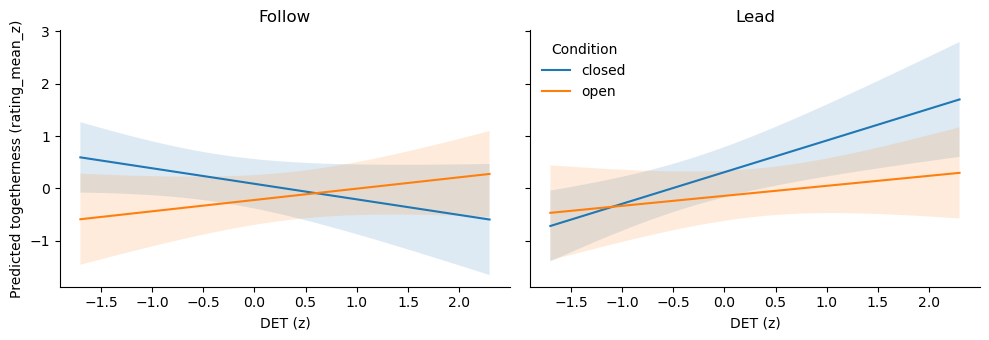

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def predict_fixed_with_ci(model, new_df, alpha=0.05):
    """
    Predicts fixed effects with confidence intervals for new data.
    """
    # Build design matrix using the model's formula machinery
    exog = model.model.exog
    exog_names = model.model.exog_names

    import patsy
    formula = model.model.formula  
    y, X = patsy.dmatrices(formula, new_df, return_type="dataframe")

    # Align columns to model params order
    X = X.reindex(columns=exog_names, fill_value=0.0)

    beta = model.params.loc[exog_names].to_numpy()
    V = model.cov_params().loc[exog_names, exog_names].to_numpy()

    yhat = X.to_numpy() @ beta
    se = np.sqrt(np.einsum("ij,jk,ik->i", X.to_numpy(), V, X.to_numpy()))

    zcrit = 1.96  
    ci_low = yhat - zcrit * se
    ci_high = yhat + zcrit * se

    return yhat, ci_low, ci_high

# ----- Build a prediction grid -----

m = model_role_DETIntConRole  # DET × Condition × Role model

# DET range
det_min, det_max = final_df["mean_DET_z"].min(), final_df["mean_DET_z"].max()
det_grid = np.linspace(det_min, det_max, 60)


cov_means = {
    "MeanBA_z": final_df["MeanBA_z"].mean(),
    "Familiarity_num": final_df["Familiarity_num"].mean(),
    "MeanAgr_z": final_df["MeanAgr_z"].mean(),
}

rows = []
for role in ["Follow", "Lead"]:
    for cond in ["closed", "open"]:
        for det in det_grid:
            r = {
                "mean_DET_z": det,
                "Role": role,
                "Condition": cond,
                **cov_means
            }
            rows.append(r)

grid = pd.DataFrame(rows)

# Dummy DV column needed for patsy dmatrices; set to 0
grid["rating_mean_z"] = 0.0

# ----- Predict + CI -----
yhat, lo, hi = predict_fixed_with_ci(m, grid)
grid["pred"] = yhat
grid["lo"] = lo
grid["hi"] = hi

# ----- Plot: facets by role -----
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)

for ax, role in zip(axes, ["Follow", "Lead"]):
    sub = grid[grid["Role"] == role]
    for cond in ["closed", "open"]:
        s = sub[sub["Condition"] == cond].sort_values("mean_DET_z")
        ax.plot(s["mean_DET_z"], s["pred"], label=cond)
        ax.fill_between(s["mean_DET_z"], s["lo"], s["hi"], alpha=0.15)

    ax.set_title(role)
    ax.set_xlabel("DET (z)")
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Predicted togetherness (rating_mean_z)")
axes[1].legend(title="Condition", frameon=False)
plt.tight_layout()
plt.show()


### Models: Role modeled separately

In [75]:
# Filter leaders only
final_df_lead = final_df[final_df["Role"] == "Lead"].copy()
print(final_df_lead)

# Filter follows only
final_df_follow = final_df[final_df["Role"] == "Follow"].copy()
print(final_df_follow)

   Pair_ID Participant_ID  Role Condition   mean_RR    std_RR    max_RR  \
0   L10F10            L10  Lead    closed  0.028838  0.017350  0.070312   
1   L10F10            L10  Lead      open  0.021332  0.014313  0.063368   
2    L10F9            L10  Lead    closed  0.020569  0.017348  0.071615   
3    L10F9            L10  Lead      open  0.022953  0.014108  0.060330   
4   L11F11            L11  Lead    closed  0.016642  0.011777  0.046875   
5   L11F11            L11  Lead      open  0.027995  0.019730  0.064236   
6   L11F12            L11  Lead    closed  0.024068  0.026118  0.087674   
7   L11F12            L11  Lead      open  0.031973  0.029950  0.128472   
8   L12F11            L12  Lead    closed  0.041884  0.036993  0.137587   
9   L12F11            L12  Lead      open  0.030585  0.029938  0.134549   
10  L12F12            L12  Lead    closed  0.023645  0.016364  0.080295   
11  L12F12            L12  Lead      open  0.026254  0.020508  0.095486   
12    L1F1             L1

##### Lead

In [ ]:
model_lead = smf.mixedlm(
    "rating_mean_z ~  mean_DET_z + Condition + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df_lead,
    groups=final_df_lead["Participant_ID"]      # random intercept for participant
).fit(reml=False)

print(model_lead.summary())


           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: rating_mean_z
No. Observations:  42      Method:             ML           
No. Groups:        12      Scale:              0.4986       
Min. group size:   2       Log-Likelihood:     -49.3992     
Max. group size:   4       Converged:          Yes          
Mean group size:   3.5                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          0.020    0.356  0.057 0.955 -0.678  0.719
Condition[T.open] -0.481    0.253 -1.898 0.058 -0.977  0.016
mean_DET_z         0.449    0.175  2.565 0.010  0.106  0.792
MeanBA_z          -0.113    0.218 -0.518 0.604 -0.539  0.314
Familiarity_num    0.103    0.115  0.893 0.372 -0.123  0.330
MeanAgr_z         -0.057    0.180 -0.315 0.753 -0.410  0.296
Group Var          0.158    0.250   

##### Follow

In [ ]:
model_follow = smf.mixedlm(
    "rating_mean_z ~  mean_DET_z + Condition + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df_follow,
    groups=final_df_follow["Participant_ID"]      # random intercept for participant
).fit(reml=False)

print(model_follow.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: rating_mean_z
No. Observations:  42      Method:             ML           
No. Groups:        12      Scale:              0.4399       
Min. group size:   2       Log-Likelihood:     -51.2702     
Max. group size:   4       Converged:          Yes          
Mean group size:   3.5                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          0.676    0.344  1.966 0.049  0.002  1.351
Condition[T.open] -0.318    0.231 -1.380 0.167 -0.771  0.134
mean_DET_z        -0.041    0.145 -0.283 0.777 -0.324  0.242
MeanBA_z          -0.011    0.189 -0.057 0.954 -0.382  0.360
Familiarity_num   -0.193    0.099 -1.950 0.051 -0.387  0.001
MeanAgr_z          0.167    0.231  0.725 0.469 -0.285  0.620
Group Var          0.443    0.422   

In [ ]:

model_leadInt = smf.mixedlm(
    "rating_mean_z ~ mean_DET_z * Condition + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df_lead,
    groups=final_df_lead["Participant_ID"]         # random intercept per participant
).fit(reml=False)

print(model_leadInt.summary())

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     rating_mean_z
No. Observations:     42          Method:                 ML           
No. Groups:           12          Scale:                  0.4239       
Min. group size:      2           Log-Likelihood:         -48.0833     
Max. group size:      4           Converged:              Yes          
Mean group size:      3.5                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.042    0.365  0.114 0.909 -0.673  0.756
Condition[T.open]            -0.450    0.235 -1.919 0.055 -0.910  0.010
mean_DET_z                    0.604    0.194  3.114 0.002  0.224  0.984
mean_DET_z:Condition[T.open] -0.416    0.244 -1.707 0.088 -0.894  0.062
MeanBA_z 

In [ ]:

model_followInt = smf.mixedlm(
    "rating_mean_z ~ mean_DET_z * Condition + MeanBA_z + Familiarity_num + MeanAgr_z",
    final_df_follow,
    groups=final_df_follow["Participant_ID"]         # random intercept per participant
).fit(reml=False)

print(model_followInt.summary())

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     rating_mean_z
No. Observations:     42          Method:                 ML           
No. Groups:           12          Scale:                  0.3887       
Min. group size:      2           Log-Likelihood:         -48.6823     
Max. group size:      4           Converged:              Yes          
Mean group size:      3.5                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.624    0.324  1.923 0.055 -0.012  1.259
Condition[T.open]            -0.303    0.217 -1.396 0.163 -0.729  0.122
mean_DET_z                   -0.315    0.181 -1.742 0.082 -0.668  0.039
mean_DET_z:Condition[T.open]  0.537    0.230  2.330 0.020  0.085  0.989
MeanBA_z 

### Models: Role modeled separately and including other's togetherness as predictor

##### lead

In [ ]:

model_leadInt_follow = smf.mixedlm(
    "rating_mean_z ~ mean_DET_z * Condition + MeanBA_z + Familiarity_num + MeanAgr_z + follow_mean_z",
    final_df_lead,
    groups=final_df_lead["Participant_ID"]         # random intercept per participant
).fit(reml=False)

print(model_leadInt_follow.summary())

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     rating_mean_z
No. Observations:     42          Method:                 ML           
No. Groups:           12          Scale:                  0.4251       
Min. group size:      2           Log-Likelihood:         -48.0811     
Max. group size:      4           Converged:              Yes          
Mean group size:      3.5                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.036    0.373  0.097 0.923 -0.694  0.766
Condition[T.open]            -0.449    0.236 -1.902 0.057 -0.912  0.014
mean_DET_z                    0.608    0.203  2.997 0.003  0.210  1.005
mean_DET_z:Condition[T.open] -0.420    0.249 -1.683 0.092 -0.908  0.069
MeanBA_z 

##### follow

In [ ]:

model_followInt_lead = smf.mixedlm(
    "rating_mean_z ~ mean_DET_z * Condition + MeanBA_z + Familiarity_num + MeanAgr_z + lead_mean_z",
    final_df_follow,
    groups=final_df_follow["Participant_ID"]         # random intercept per participant
).fit(reml=False)

print(model_followInt_lead.summary())

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     rating_mean_z
No. Observations:     42          Method:                 ML           
No. Groups:           12          Scale:                  0.2996       
Min. group size:      2           Log-Likelihood:         -44.7496     
Max. group size:      4           Converged:              Yes          
Mean group size:      3.5                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.572    0.306  1.872 0.061 -0.027  1.171
Condition[T.open]            -0.114    0.202 -0.565 0.572 -0.511  0.282
mean_DET_z                   -0.568    0.184 -3.095 0.002 -0.928 -0.208
mean_DET_z:Condition[T.open]  0.720    0.213  3.383 0.001  0.303  1.138
MeanBA_z 

C:\Users\au605619\AppData\Local\Temp\ipykernel_24568\1020462415.py:79: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if "Condition" in df.columns and pd.api.types.is_categorical_dtype(df["Condition"]):


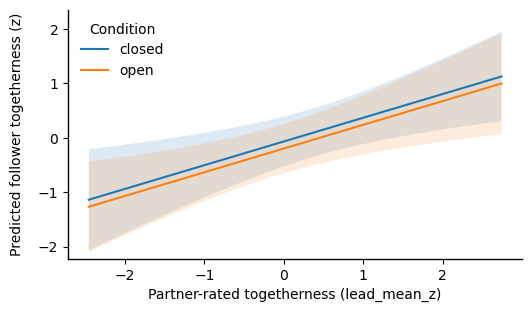

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import patsy

# ------------------------------------------------------------
# Plot: follower model predicted togetherness vs lead_mean_z
# (with separate lines for Condition)
# ------------------------------------------------------------

def predict_fixed_with_ci_mixedlm(result, new_df, alpha=0.05):
    """
    Predicts fixed effects with confidence intervals for new data
    """
    design_info = result.model.data.design_info
    X = patsy.build_design_matrices([design_info], new_df, return_type="dataframe")[0]

    fe = result.fe_params
    fe_names = fe.index

    # Align columns to fixed-effects names
    X = X.reindex(columns=fe_names, fill_value=0.0)

    # Covariance of fixed effects
    V = result.cov_params().loc[fe_names, fe_names].to_numpy(dtype=float)

    Xmat = X.to_numpy(dtype=float)
    beta = fe.to_numpy(dtype=float)

    yhat = Xmat @ beta
    se = np.sqrt(np.einsum("ij,jk,ik->i", Xmat, V, Xmat))

    zcrit = norm.ppf(1 - alpha / 2)  # ~1.96
    lo = yhat - zcrit * se
    hi = yhat + zcrit * se

    return yhat, lo, hi



m = model_followInt_lead
df = final_df_follow.copy()

# Grid for partner mean (lead_mean_z)
xcol = "lead_mean_z"
xmin, xmax = df[xcol].min(), df[xcol].max()
xgrid = np.linspace(xmin, xmax, 60)


hold = {
    "mean_DET_z": df["mean_DET_z"].mean(),
    "MeanBA_z": df["MeanBA_z"].mean(),
    "Familiarity_num": df["Familiarity_num"].mean(),
    "MeanAgr_z": df["MeanAgr_z"].mean(),
}

# Conditions to plot 
conds = ["closed", "open"]
if "Condition" in df.columns:
    df["Condition"] = df["Condition"].astype("category")
    conds = [c for c in conds if c in df["Condition"].cat.categories.tolist()] or df["Condition"].cat.categories.tolist()

rows = []
for cond in conds:
    for x in xgrid:
        rows.append({"Condition": cond, xcol: x, **hold})

grid = pd.DataFrame(rows)


if "Condition" in df.columns and pd.api.types.is_categorical_dtype(df["Condition"]):
    grid["Condition"] = pd.Categorical(grid["Condition"], categories=df["Condition"].cat.categories)

# Predict
pred, lo, hi = predict_fixed_with_ci_mixedlm(m, grid)
grid["pred"] = pred
grid["lo"] = lo
grid["hi"] = hi

# ---- Plot ----

fig, ax = plt.subplots(figsize=(5.4, 3.2))

for cond in conds:
    sub = grid[grid["Condition"] == cond].sort_values(xcol)
    ax.plot(sub[xcol], sub["pred"], label=str(cond))
    ax.fill_between(sub[xcol], sub["lo"], sub["hi"], alpha=0.15)

ax.set_xlabel("Partner-rated togetherness (lead_mean_z)")
ax.set_ylabel("Predicted follower togetherness (z)", labelpad=10)
ax.set_title("") 
ax.grid(False)

# Spines: left & bottom only
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_linewidth(1.0)
ax.spines["bottom"].set_linewidth(1.0)

ax.legend(title="Condition", frameon=False)


ymin = grid["lo"].min(skipna=True)
ymax = grid["hi"].max(skipna=True)
yr = ymax - ymin if np.isfinite(ymax - ymin) and (ymax - ymin) > 0 else 1.0
ax.set_ylim(ymin - 0.03 * yr, ymax + 0.10 * yr)


fig.subplots_adjust(left=0.18, top=0.92)

plt.tight_layout(pad=1.0)
plt.show()


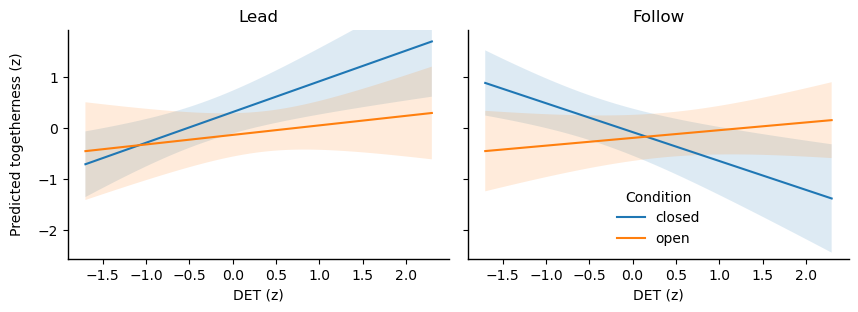

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import patsy

# ============================================================
# Functions for plotting DET by Condition panels
# ============================================================

def predict_fixed_with_ci_mixedlm(result, new_df, alpha=0.05):
    """
 
    """
    design_info = result.model.data.design_info
    X = patsy.build_design_matrices([design_info], new_df, return_type="dataframe")[0]

    fe = result.fe_params
    fe_names = fe.index
    X = X.reindex(columns=fe_names, fill_value=0.0)

    V = result.cov_params().loc[fe_names, fe_names].to_numpy(dtype=float)

    Xmat = X.to_numpy(dtype=float)
    beta = fe.to_numpy(dtype=float)

    yhat = Xmat @ beta
    se = np.sqrt(np.einsum("ij,jk,ik->i", Xmat, V, Xmat))

    zcrit = norm.ppf(1 - alpha / 2)
    lo = yhat - zcrit * se
    hi = yhat + zcrit * se
    return yhat, lo, hi


def build_det_grid(df, det_col="mean_DET_z", condition_col="Condition",
                   n_points=60, hold_means=None, dv_col="rating_mean_z"):
    """
   
    """ 
    if hold_means is None:
        hold_means = {}

    # DET range from data
    det_min, det_max = df[det_col].min(), df[det_col].max()
    det_grid = np.linspace(det_min, det_max, n_points)

    # Conditions to plot
    conds = ["closed", "open"]
    if condition_col in df.columns:
        tmp = df.copy()
        tmp[condition_col] = tmp[condition_col].astype("category")
        conds = [c for c in conds if c in tmp[condition_col].cat.categories.tolist()] or tmp[condition_col].cat.categories.tolist()
        cond_categories = tmp[condition_col].cat.categories
    else:
        cond_categories = None

    rows = []
    for cond in conds:
        for det in det_grid:
            r = {condition_col: cond, det_col: det, **hold_means}
            rows.append(r)
    grid = pd.DataFrame(rows)


    if cond_categories is not None:
        grid[condition_col] = pd.Categorical(grid[condition_col], categories=cond_categories)

    # Dummy 
    grid[dv_col] = 0.0
    return grid, conds


def plot_det_by_condition(ax, model, df, panel_title,
                          det_col="mean_DET_z", condition_col="Condition",
                          dv_col="rating_mean_z",
                          hold_cols=("MeanBA_z", "Familiarity_num", "MeanAgr_z"),
                          extra_hold=None):
    """
    Plot predicted DV vs DET with separate lines for Condition.
    Holds covariates at their means (and any extra_hold values).
    """
    # Hold covariates at means
    hold_means = {}
    for c in hold_cols:
        if c in df.columns:
            hold_means[c] = float(df[c].mean())

    
    if extra_hold:
        for k, v in extra_hold.items():
            hold_means[k] = float(v)

    grid, conds = build_det_grid(
        df=df,
        det_col=det_col,
        condition_col=condition_col,
        n_points=60,
        hold_means=hold_means,
        dv_col=dv_col,
    )

    # Predict
    pred, lo, hi = predict_fixed_with_ci_mixedlm(model, grid)
    grid["pred"], grid["lo"], grid["hi"] = pred, lo, hi

    for cond in conds:
        sub = grid[grid[condition_col] == cond].sort_values(det_col)
        ax.plot(sub[det_col], sub["pred"], label=str(cond))
        ax.fill_between(sub[det_col], sub["lo"], sub["hi"], alpha=0.15)

    ax.set_title(panel_title)
    ax.set_xlabel("DET (z)")
    ax.grid(False)

    # spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)
    ax.spines["left"].set_linewidth(1.0)
    ax.spines["bottom"].set_linewidth(1.0)

    # add some headroom
    ymin = grid["lo"].min(skipna=True)
    ymax = grid["hi"].max(skipna=True)
    yr = ymax - ymin if np.isfinite(ymax - ymin) and (ymax - ymin) > 0 else 1.0
    ax.set_ylim(ymin - 0.03 * yr, ymax + 0.10 * yr)



# ------------------------------------------------------------
# Lead final model object 
m_lead = model_leadInt           
df_lead = final_df_lead       

# Follow final model object
m_follow = model_followInt_lead 
df_follow = final_df_follow     

extra_hold_follow = {}
if "lead_mean_z" in df_follow.columns:
    extra_hold_follow["lead_mean_z"] = float(df_follow["lead_mean_z"].mean())

# ------------------------------------------------------------
# Plot: two panels
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(8.8, 3.2), sharey=True)

plot_det_by_condition(
    ax=axes[0],
    model=m_lead,
    df=df_lead,
    panel_title="Lead",
    extra_hold=None
)

plot_det_by_condition(
    ax=axes[1],
    model=m_follow,
    df=df_follow,
    panel_title="Follow",
    extra_hold=extra_hold_follow
)

axes[0].set_ylabel("Predicted togetherness (z)", labelpad=10)
axes[1].legend(title="Condition", frameon=False)

# margins 
fig.subplots_adjust(left=0.12, top=0.90, wspace=0.25)
plt.tight_layout(pad=1.0)
plt.show()


### Correlation

Overall: r = 0.029, p = 0.857, n = 42, 95% CI [-0.278, 0.330]
closed: r = -0.119, p = 0.608, n = 21, 95% CI [-0.524, 0.330]
open: r = 0.215, p = 0.350, n = 21, 95% CI [-0.239, 0.592]


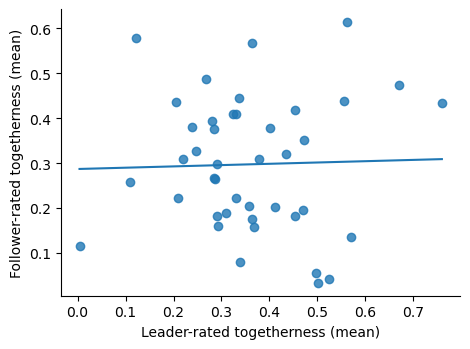

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# --------------------------
# 1) Pair-mean dataset
# --------------------------
df = Togetherness.copy()

# Ensure consistent role labels
df["Role"] = df["Role"].str.lower().str.strip()

# Average within Pair_ID x Condition x Role (one value per dyad/condition/role)
pair_means = (
    df.groupby(["Pair_ID", "Condition", "Role"], as_index=False)["rating_mean"]
      .mean()
)

# Wide format: one row per Pair_ID x Condition with lead and follow columns
wide = pair_means.pivot_table(
    index=["Pair_ID", "Condition"],
    columns="Role",
    values="rating_mean"
).reset_index()

# Keep only rows where both lead and follow exist
wide = wide.dropna(subset=["lead", "follow"])

# --------------------------
# 2) Correlations
# --------------------------
def corr_report(x, y):
    r, p = stats.pearsonr(x, y)
    n = len(x)
    # Fisher z CI for r
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    zcrit = 1.96
    lo = np.tanh(z - zcrit * se)
    hi = np.tanh(z + zcrit * se)
    return r, p, n, lo, hi

# Overall
r, p, n, lo, hi = corr_report(wide["lead"].to_numpy(), wide["follow"].to_numpy())
print(f"Overall: r = {r:.3f}, p = {p:.3f}, n = {n}, 95% CI [{lo:.3f}, {hi:.3f}]")

# By condition
for cond, sub in wide.groupby("Condition"):
    r, p, n, lo, hi = corr_report(sub["lead"].to_numpy(), sub["follow"].to_numpy())
    print(f"{cond}: r = {r:.3f}, p = {p:.3f}, n = {n}, 95% CI [{lo:.3f}, {hi:.3f}]")

# --------------------------
# 3) Scatterplot with regression line
# --------------------------
fig, ax = plt.subplots(figsize=(4.8, 3.6))

# Scatter (overall)
ax.scatter(wide["lead"], wide["follow"], alpha=0.8)

# Regression line (overall)
slope, intercept, r_val, p_val, _ = stats.linregress(wide["lead"], wide["follow"])
xline = np.linspace(wide["lead"].min(), wide["lead"].max(), 100)
ax.plot(xline, intercept + slope * xline)

ax.set_xlabel("Leader-rated togetherness (mean)")
ax.set_ylabel("Follower-rated togetherness (mean)")
ax.set_title("") 
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


### Model Diagnostics

3.11.5 Model diagnostics and comparison
Model assumptions were evaluated using residual Q–Q plots (normality) and residuals-versus-fitted plots (homoscedasticity/linearity). Influential observations were screened using leverage and Cook’s distance. For mixed models, random-intercept variance estimates were inspected to ensure participant-level clustering was captured and not degenerate (report estimated variance of the participant intercept; note if it’s near zero (singular fit–like issue).


###  residual Q–Q plots (normality) and residuals-versus-fitted plots 

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_mixedlm_diagnostics(result, title_prefix="MixedLM"):
    """
    Faceted diagnostics for statsmodels MixedLMResults:
      Left:  Residual Q–Q plot (normality)
      Right: Residuals vs fitted (linearity / homoscedasticity)
    """
    fitted = np.asarray(result.fittedvalues)
    resid = np.asarray(result.resid)

    fig, axes = plt.subplots(1, 2, figsize=(11, 4))

    # --- Q–Q plot ---
    stats.probplot(resid, dist="norm", plot=axes[0])
    axes[0].set_title("Residual Q–Q plot")
    axes[0].set_xlabel("Theoretical quantiles")
    axes[0].set_ylabel("Sample quantiles")

    # --- Residuals vs fitted ---
    axes[1].scatter(fitted, resid)
    axes[1].axhline(0, linestyle="--")
    axes[1].set_title("Residuals vs fitted")
    axes[1].set_xlabel("Fitted values")
    axes[1].set_ylabel("Residuals")

    fig.suptitle(f"{title_prefix}: Model diagnostics", y=1.02)
    fig.tight_layout()
    plt.show()




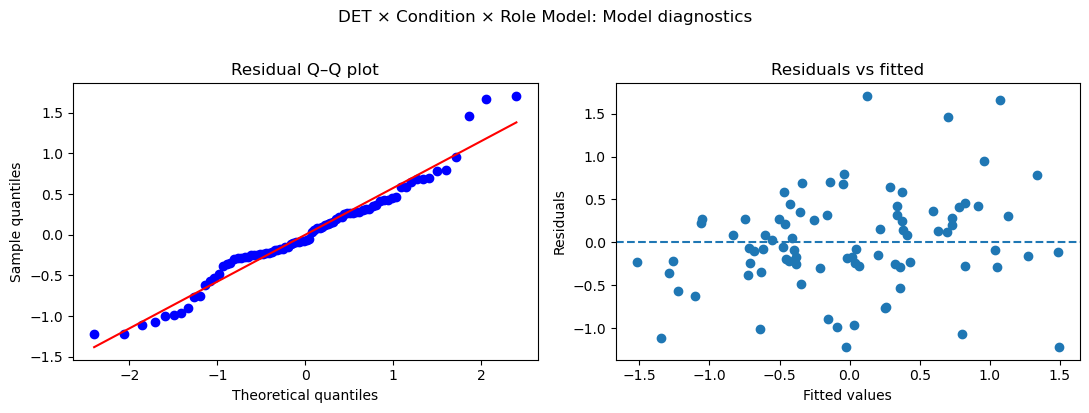

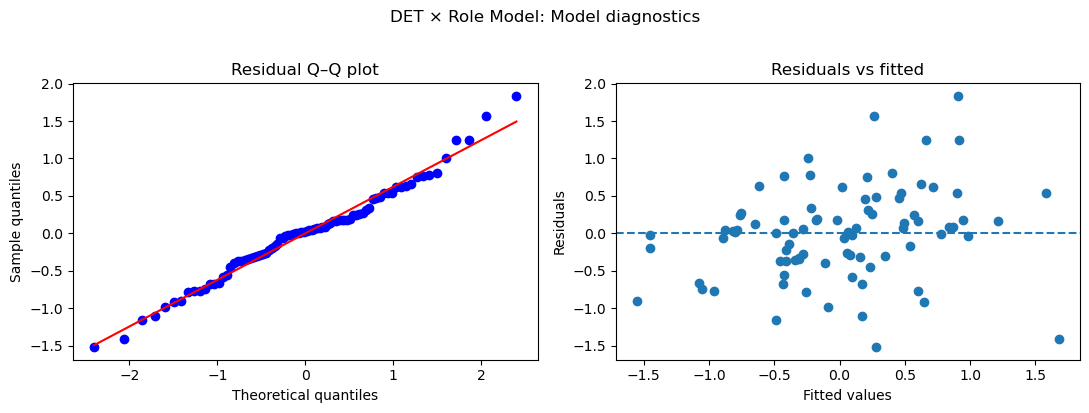

In [176]:

plot_mixedlm_diagnostics(model_role_DETIntConRole, title_prefix="DET × Condition × Role Model")
plot_mixedlm_diagnostics(model_role_DETInt, title_prefix="DET × Role Model")

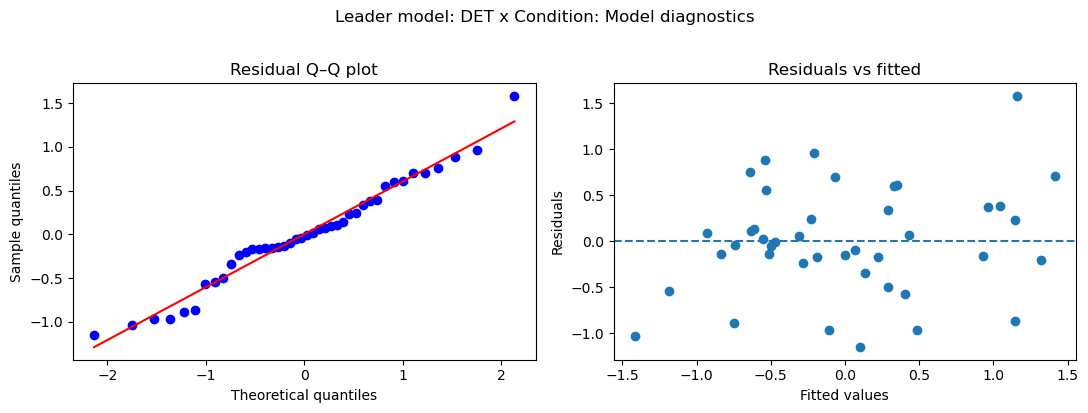

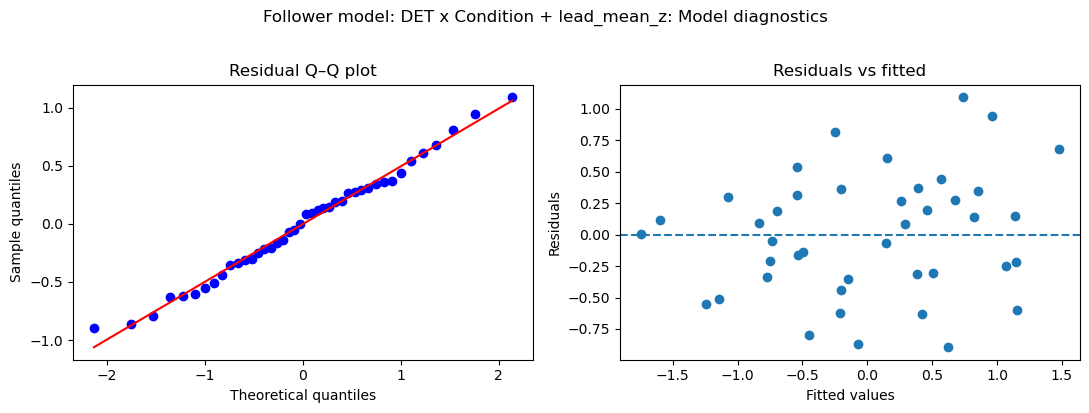

In [178]:
plot_mixedlm_diagnostics(model_leadInt, title_prefix="Leader model: DET x Condition")
plot_mixedlm_diagnostics(model_followInt_lead, title_prefix="Follower model: DET x Condition + lead_mean_z")

### R2

In [ ]:
import numpy as np

def r2_nakagawa_mixedlm(result):
    # Fixed-effects linear predictor
    X = result.model.exog                      # design matrix for fixed effects
    beta = result.fe_params.values             # fixed effect coefficients
    yhat_fixed = X @ beta
    var_fixed = np.var(yhat_fixed, ddof=1)

    
    cov_re = np.asarray(result.cov_re)         # random effects covariance matrix
    var_random = np.trace(cov_re)

    # Residual variance (Gaussian)
    var_resid = float(result.scale)

    var_total = var_fixed + var_random + var_resid
    r2_m = var_fixed / var_total
    r2_c = (var_fixed + var_random) / var_total

    return {"R2_marginal": r2_m, "R2_conditional": r2_c,
            "var_fixed": var_fixed, "var_random": var_random, "var_resid": var_resid}



In [ ]:
# Main reported models
model_followInt_lead_r2 = r2_nakagawa_mixedlm(model_followInt_lead) # rating_mean_z ~ mean_DET_z * Condition + MeanBA_z + Familiarity_num + MeanAgr_z + lead_mean_z
print(model_followInt_lead_r2)

model_followInt_r2 = r2_nakagawa_mixedlm(model_followInt) # rating_mean_z ~ mean_DET_z * Condition + MeanBA_z + Familiarity_num + MeanAgr_z
print(model_followInt_r2)

model_role_DETIntConRole_r2 = r2_nakagawa_mixedlm(model_role_DETIntConRole)  # rating_mean_z ~ mean_DET_z * Condition * Role + MeanBA_z + Familiarity_num + MeanAgr_z
print(model_role_DETIntConRole_r2)


model_leadInt_follow_r2 = r2_nakagawa_mixedlm(model_leadInt_follow)  # rating_mean_z ~ mean_DET_z * Condition + MeanBA_z + Familiarity_num + MeanAgr_z + follow_mean_z
print(model_leadInt_follow_r2)


model_role_DETIntCon_r2 = r2_nakagawa_mixedlm(model_role_DETIntCon)  # rating_mean_z ~ mean_DET_z * Condition +  Role + MeanBA_z + Familiarity_num + MeanAgr_z
print(model_role_DETIntCon_r2)

model_role_DETInt_r2 = r2_nakagawa_mixedlm(model_role_DETInt)  # rating_mean_z ~ mean_DET_z * Role + Condition + MeanBA_z + Familiarity_num + MeanAgr_z
print(model_role_DETInt_r2)

model_leadInt_r2 = r2_nakagawa_mixedlm(model_leadInt)  # mean_DET_z * Condition + MeanBA_z + Familiarity_num + MeanAgr_z
print(model_leadInt_r2)


 
 
 # Other models
  
model_role_DET_r2 = r2_nakagawa_mixedlm(model_role_DET)  # rating_mean_z ~ mean_DET_z + Role + Condition + MeanBA_z + Familiarity_num + MeanAgr_z
print(model_role_DET_r2)

model_role_LAM_r2 = r2_nakagawa_mixedlm(model_role_LAM)  # rating_mean_z ~ mean_LAM_z + Role + Condition + MeanBA_z + Familiarity_num + MeanAgr_z
print(model_role_LAM_r2)


model_role_LAMInt_r2 = r2_nakagawa_mixedlm(model_role_LAMInt)  # rating_mean_z ~ mean_LAM_z * Role + Condition + MeanBA_z + Familiarity_num + MeanAgr_z
print(model_role_LAMInt_r2)

model_role_LAMIntCon_r2 = r2_nakagawa_mixedlm(model_role_LAMIntCon)  # rating_mean_z ~ mean_LAM_z * Condition + Role + MeanBA_z + Familiarity_num + MeanAgr_z
print(model_role_LAMIntCon_r2)

model_role_LAMIntConRole_r2 = r2_nakagawa_mixedlm(model_role_LAMIntConRole)  # rating_mean_z ~ mean_LAM_z * Condition * Role + MeanBA_z + Familiarity_num + MeanAgr_z
print(model_role_LAMIntConRole_r2)






{'R2_marginal': 0.28223431697587165, 'R2_conditional': 0.6997920873123261, 'var_fixed': 0.2817092360799261, 'var_random': 0.41678092785143506, 'var_resid': 0.2996493929390726}
{'R2_marginal': 0.17752772948579856, 'R2_conditional': 0.5905567119250534, 'var_fixed': 0.16853591386358152, 'var_random': 0.3921089804345946, 'var_resid': 0.3887049022194639}
{'R2_marginal': 0.15056859122837546, 'R2_conditional': 0.5559000949561782, 'var_fixed': 0.14153333138941052, 'var_random': 0.3810085328663413, 'var_resid': 0.41745053545222793}
{'R2_marginal': 0.23923225452638927, 'R2_conditional': 0.5137442428489615, 'var_fixed': 0.20915334281545506, 'var_random': 0.23999732023697407, 'var_resid': 0.4251183322781471}
{'R2_marginal': 0.05249456097986664, 'R2_conditional': 0.5030928391068132, 'var_fixed': 0.050783780833388255, 'var_random': 0.4359134312805737, 'var_resid': 0.48071312307991604}
{'R2_marginal': 0.10444551845941405, 'R2_conditional': 0.49190642967477904, 'var_fixed': 0.09731713138587621, 'var_r

#### Calculating VIF (Variance Inflation Factor)

In [90]:
print(final_df_follow)

   Pair_ID Participant_ID    Role Condition   mean_RR    std_RR    max_RR  \
42  L10F10            F10  Follow    closed  0.028838  0.017350  0.070312   
43  L10F10            F10  Follow      open  0.021332  0.014313  0.063368   
44   L10F9             F9  Follow    closed  0.020569  0.017348  0.071615   
45   L10F9             F9  Follow      open  0.022953  0.014108  0.060330   
46  L11F11            F11  Follow    closed  0.016642  0.011777  0.046875   
47  L11F11            F11  Follow      open  0.027995  0.019730  0.064236   
48  L11F12            F12  Follow    closed  0.024068  0.026118  0.087674   
49  L11F12            F12  Follow      open  0.031973  0.029950  0.128472   
50  L12F11            F11  Follow    closed  0.041884  0.036993  0.137587   
51  L12F11            F11  Follow      open  0.030585  0.029938  0.134549   
52  L12F12            F12  Follow    closed  0.023645  0.016364  0.080295   
53  L12F12            F12  Follow      open  0.026254  0.020508  0.095486   

In [95]:
# change condition to 0 and 1
final_df_follow["Condition_num"] = final_df["Condition"].replace({
    "closed": 0,
    "open": 1
})


# change condition to 0 and 1
final_df_lead["Condition_num"] = final_df["Condition"].replace({
    "closed": 0,
    "open": 1
})


C:\Users\au605619\AppData\Local\Temp\ipykernel_24568\1521670729.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df_follow["Condition_num"] = final_df["Condition"].replace({
C:\Users\au605619\AppData\Local\Temp\ipykernel_24568\1521670729.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df_lead["Condition_num"] = final_df["Condition"].replace({


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = final_df_follow[[
    "mean_DET_z",
    "Condition_num",   
    "MeanBA_z",
    "Familiarity_num",
    "MeanAgr_z",
    "lead_mean_z"       
]]

# Add intercept
X = sm.add_constant(X)

# Compute VIF
vif_df_follow = pd.DataFrame()
vif_df_follow["Variable"] = X.columns
vif_df_follow["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df_follow)


          Variable       VIF
0            const  6.375335
1       mean_DET_z  1.972295
2    Condition_num  1.341330
3         MeanBA_z  1.036409
4  Familiarity_num  1.076348
5        MeanAgr_z  1.257134
6      lead_mean_z  1.847400


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select predictors
X = final_df_lead[[
    "mean_DET_z",
    "Condition_num",   
    "MeanBA_z",
    "Familiarity_num",
    "MeanAgr_z",
    "follow_mean_z"      
]]

# Intercept
X = sm.add_constant(X)

# Compute VIF
vif_df_lead = pd.DataFrame()
vif_df_lead["Variable"] = X.columns
vif_df_lead["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df_lead)


          Variable       VIF
0            const  7.193057
1       mean_DET_z  1.202341
2    Condition_num  1.191180
3         MeanBA_z  1.272634
4  Familiarity_num  1.107525
5        MeanAgr_z  1.217337
6    follow_mean_z  1.218611


#### AIC, BIC, and Log-Likelihood

In [151]:
# Separate Role models
print("AIC:", model_follow.aic)
print("BIC:", model_follow.bic)
print("Log-Likelihood:", model_follow.llf)

print("AIC:", model_lead.aic)
print("BIC:", model_lead.bic)
print("Log-Likelihood:", model_lead.llf)

AIC: 118.54038534484505
BIC: 132.441742291112
Log-Likelihood: -51.270192672422525
AIC: 114.79839101389447
BIC: 128.69974796016143
Log-Likelihood: -49.39919550694724


In [145]:
# Separate Role models
print("AIC:", model_followInt.aic)
print("BIC:", model_followInt.bic)
print("Log-Likelihood:", model_followInt.llf)

print("AIC:", model_followInt_lead.aic)
print("BIC:", model_followInt_lead.bic)
print("Log-Likelihood:", model_followInt_lead.llf)

print("AIC:", model_leadInt.aic)
print("BIC:", model_leadInt.bic)
print("Log-Likelihood:", model_leadInt.llf)

print("AIC:", model_leadInt_follow.aic)
print("BIC:", model_leadInt_follow.bic)
print("Log-Likelihood:", model_leadInt_follow.llf)

AIC: 115.36465013382107
BIC: 131.00367669837138
Log-Likelihood: -48.682325066910536
AIC: 109.49928533058002
BIC: 126.8759815134137
Log-Likelihood: -44.74964266529001
AIC: 114.16662926185273
BIC: 129.80565582640304
Log-Likelihood: -48.08331463092637
AIC: 116.16211917893094
BIC: 133.53881536176462
Log-Likelihood: -48.08105958946547


In [133]:
# Baseline models
print("AIC:", model_role_DET.aic)
print("BIC:", model_role_DET.bic)
print("Log-Likelihood:", model_role_DET.llf)

print("AIC:", model_role_LAM.aic)
print("BIC:", model_role_LAM.bic)
print("Log-Likelihood:", model_role_LAM.llf)

AIC: 245.25582414759594
BIC: 267.1331753371858
Log-Likelihood: -113.62791207379797
AIC: 231.03211201828958
BIC: 252.9094632078794
Log-Likelihood: -106.51605600914479


In [134]:
# Role interaction models
print("AIC:", model_role_LAMInt.aic)
print("BIC:", model_role_LAMInt.bic)
print("Log-Likelihood:", model_role_LAMInt.llf)

print("AIC:", model_role_DETInt.aic)
print("BIC:", model_role_DETInt.bic)
print("Log-Likelihood:", model_role_DETInt.llf)

AIC: 231.17706788838376
BIC: 255.4852358768169
Log-Likelihood: -105.58853394419188
AIC: 226.3042417867983
BIC: 250.6124097752314
Log-Likelihood: -103.15212089339914


In [135]:
# Condition interaction models
print("AIC:", model_role_LAMIntCon.aic)
print("BIC:", model_role_LAMIntCon.bic)
print("Log-Likelihood:", model_role_LAMIntCon.llf)

print("AIC:", model_role_DETIntCon .aic)
print("BIC:", model_role_DETIntCon .bic)
print("Log-Likelihood:", model_role_DETIntCon .llf)

AIC: 232.95080689836374
BIC: 257.25897488679686
Log-Likelihood: -106.47540344918187
AIC: 230.63500470591913
BIC: 254.94317269435226
Log-Likelihood: -105.31750235295956


In [136]:
# Role + condition interaction models
print("AIC:", model_role_LAMIntConRole.aic)
print("BIC:", model_role_LAMIntConRole.bic)
print("Log-Likelihood:", model_role_LAMIntConRole.llf)

print("AIC:", model_role_DETIntConRole .aic)
print("BIC:", model_role_DETIntConRole .bic)
print("Log-Likelihood:", model_role_DETIntConRole .llf)





AIC: 232.89307133846995
BIC: 264.493689723433
Log-Likelihood: -103.44653566923498
AIC: 224.89885281265333
BIC: 256.4994711976164
Log-Likelihood: -99.44942640632667
